In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
#import pygeos
import matplotlib.pyplot as plt

/Users/taoliang/opt/anaconda3/envs/HCI/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
!conda update geopandas

Solving environment: done

# All requested packages already installed.



In [2]:
print(gpd.__version__)

0.10.2


# 1. Lion Data cleanning

In [3]:
LION21A = gpd.read_file('./Data/GeoBase/LION_21A/LION_21A.shp')
LION21A.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,...,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,geometry
0,1.0,EAST 168 STREET,None,0,U,None,B,None,T,DOT,...,599,699,596,716,2251001000000,None,None,None,396.030947,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,None,0,U,None,B,None,A,DOT,...,58,98,63,99,2798401000000,None,None,None,279.360514,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,None,0,U,None,B,None,W,DOT,...,1017,1079,1016,1084,2728001000000,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,4.0,UNION AVENUE,BEHAGEN PLAYGROUND COMFORT STA,0,U,None,B,None,W,DOT,...,0,0,0,0,21279502000000X,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
4,5.0,UNION AVENUE,BEHAGEN PLAYGROUND FIELD NORTH,0,U,None,B,None,W,DOT,...,0,0,0,0,21279503000000X,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."


In [154]:
len(LION21A)

230558

In [155]:
Corridor = LION21A.copy()
Corridor = Corridor.loc[(Corridor['FeatureTyp'] == '0') | (Corridor['FeatureTyp'] == '1') ] #street and railroad
Corridor = Corridor.loc[(Corridor['RB_Layer']=='G') | (Corridor['RB_Layer']=='B')] # only centre line
Corridor = Corridor.loc[(Corridor['TrafDir']!='P')] #filter out ped only street
Corridor = Corridor.drop_duplicates(subset=['SegmentID'], keep='first')
len(Corridor)

132385

In [163]:
Corridor['RBoro'].unique()

array([ 2., nan,  3.,  1.,  4.,  5.])

In [166]:
# filter out the staten island network
Corridor_nyc = Corridor.loc[Corridor['LBoro'].isin([1., 2., 3., 4.])]
Corridor_nyc = Corridor.loc[Corridor['RBoro'].isin([1., 2., 3., 4.])]
len(Corridor_nyc)

116061

In [170]:
Corridor_nyc = Corridor_nyc.to_crs(4326)

<AxesSubplot:>

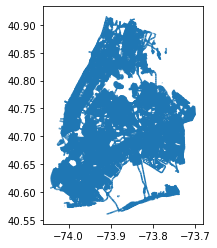

In [171]:
Corridor_nyc.plot()

In [172]:
pd.options.display.max_columns = 150

In [173]:
Corridor_nyc = Corridor_nyc[['OBJECTID','Street', 'StreetCode', 'SegmentID','SHAPE_Leng','geometry','StreetWidt', 'BikeLane','Number_Tra','Number_Par','Number_Tot','TRUCK_ROUT','LBoro']]
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,geometry,StreetWidt,BikeLane,Number_Tra,Number_Par,Number_Tot,TRUCK_ROUT,LBoro
0,1.0,EAST 168 STREET,226700,0078126,396.030947,"LINESTRING (-73.90347 40.83035, -73.90238 40.8...",34.0,None,2,2,4,None,2.0
1,2.0,WEST 192 STREET,274810,0079796,279.360514,"LINESTRING (-73.90120 40.86661, -73.90207 40.8...",30.0,None,1,2,3,None,2.0
2,3.0,UNION AVENUE,270420,0077356,618.327133,"LINESTRING (-73.90118 40.82439, -73.90051 40.8...",34.0,None,1,2,3,None,2.0
7,8.0,WEST 252 STREET,275175,0174633,16.897559,"LINESTRING (-73.90707 40.89927, -73.90712 40.8...",30.0,None,2,None,2,None,2.0
8,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,"LINESTRING (-73.90538 40.83977, -73.90454 40.8...",70.0,None,4,2,6,None,2.0


In [174]:
Corridor_nyc.BikeLane.unique()

array([None, '2', '3', '11', '1', '4', '8', '7', '6', '5', '10', '9'],
      dtype=object)

In [175]:
Corridor_nyc['BikeLane'] = Corridor_nyc['BikeLane'].fillna(0)

/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [176]:
Corridor_nyc['BikeLane'].unique()

array([0, '2', '3', '11', '1', '4', '8', '7', '6', '5', '10', '9'],
      dtype=object)

In [177]:
# LIST OF VALUES
# VALUE 1
# DESCRIPTION Class 1: Separated Greenway
# VALUE 2
# DESCRIPTION Class II: Striped Bike Lane
# VALUE 3
# DESCRIPTION Class III: Signed Bicycle Route
# VALUE 4
# DESCRIPTION Links: Connecting segments.
# VALUE 5
# DESCRIPTION Class I, II: Combination of Class I and II
# VALUE 6
# DESCRIPTION Class II, III: Combination of Class II and III
# VALUE 7
# DESCRIPTION Stairs: Includes step streets, bridge stairs, etc. 

### Dummy variables

In [178]:
Corridor_nyc['With_BikeLane'] = [1 if n != 0 else 0 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['With_BikeLane'])

11956

In [179]:
a=['1','5']
Corridor_nyc['Protected_Lane'] = [1 if n in a else 0 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['Protected_Lane'])

2100

In [180]:
b=['1','5', 0]
Corridor_nyc['Unprotected_Lane'] = [0 if n in b else 1 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['Unprotected_Lane'])

9856

In [181]:
Corridor_nyc.TRUCK_ROUT.unique()

array([None, '2', '3'], dtype=object)

In [182]:
c=['2','3']
Corridor_nyc['Truck'] = [1 if n in c else 0 for n in Corridor_nyc.TRUCK_ROUT]
sum(Corridor_nyc['Truck'])

13919

In [183]:
Corridor_nyc = Corridor_nyc.dropna(subset=['StreetWidt']).drop(columns=['TRUCK_ROUT','BikeLane'])
len(Corridor_nyc)

93685

In [188]:
Corridor_nyc = pd.get_dummies(Corridor_nyc, columns=['LBoro'])

In [204]:
Corridor_nyc.columns = ['OBJECTID', 'Street', 'StreetCode', 'SegmentID', 'SHAPE_Leng',
                        'geometry', 'StreetWidt', 'Number_Tra', 'Number_Par', 'Number_Tot',
                        'With_BikeLane', 'Protected_Lane', 'Unprotected_Lane', 'Truck',
                        'Manhattan','Bronx','Brooklyn','Queens']

In [206]:
Corridor_nyc  = Corridor_nyc.loc[Corridor_nyc['StreetWidt'] > 0]
Corridor_nyc['Number_Tra'] = Corridor_nyc['Number_Tra'].fillna(0).astype(int)
Corridor_nyc['Number_Par'] = Corridor_nyc['Number_Par'].fillna(0).astype(int)
Corridor_nyc['Number_Tot'] = Corridor_nyc['Number_Tot'].fillna(0).astype(int)
Corridor_nyc.describe()

/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,OBJECTID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens
count,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000
mean,95326.770520,284.169310,36.094322,1.703386,1.522821,3.225832,0.127733,0.022381,0.105352,0.148774,0.130223,0.178612,0.269447,0.420409
std,56292.937279,229.982606,11.857834,0.950921,0.808613,1.141376,0.333794,0.147922,0.307008,0.355867,0.336550,0.383029,0.443675,0.493627
min,1.000000,3.102845,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47310.250000,118.246423,30.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97349.000000,256.615174,32.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146424.750000,371.572854,42.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,191603.000000,12484.330543,200.000000,16.000000,4.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
Corridor_nyc.to_file('./Data/GeoBase/Corridor_nyc.geojson', driver='GeoJSON')

# 2. Spatial join with social economic data

In [22]:
Corridor_nyc = gpd.read_file('./Data/GeoBase/Corridor_nyc.geojson').to_crs(2263)
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,0,0,0,0,1,0,0,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,0,0,0,0,1,0,0,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,0,0,0,0,1,0,0,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [23]:
len(Corridor_nyc)

93202

In [24]:
Social_Economic = gpd.read_file("./Data/Social_Economic/Social_Economic.geojson", index_col=0)
Social_Economic.head()

,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID,geometry
0,3453,36.1,41563,29.6,22.1,6.9,62.9,81.0,36047009202,"POLYGON ((985286.415 174204.098, 985125.723 17..."
1,2293,31.6,51346,7.5,22.4,5.5,52.3,58.2,36047009401,"POLYGON ((984190.553 174077.201, 984028.580 17..."
2,2746,33.9,58750,17.2,26.3,1.9,42.8,66.3,36047009402,"POLYGON ((984802.200 173592.177, 984640.393 17..."
3,5858,38.0,62614,36.2,27.4,6.7,54.1,70.5,36047009600,"POLYGON ((983580.277 174561.258, 983417.994 17..."
4,6021,33.6,56229,15.3,8.4,4.7,53.2,69.2,36047009800,"POLYGON ((982932.782 173745.218, 982770.984 17..."


In [25]:
Social_Economic.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
Social_Economic.describe()

,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2.206000e+03
mean,3777.860381,38.122484,74632.953309,40.972121,37.108568,6.734587,51.323799,48.549592,3.605496e+10
std,1912.487195,6.966206,36594.085605,28.490567,21.223979,5.030842,16.068573,24.252985,2.584131e+07
min,64.000000,11.600000,2499.000000,0.000000,2.100000,0.000000,0.000000,0.000000,3.600500e+10
25%,2336.500000,33.600000,50450.750000,14.500000,21.400000,3.600000,39.700000,27.200000,3.604703e+10
50%,3487.000000,37.400000,69375.000000,36.750000,32.100000,5.700000,53.200000,51.000000,3.604712e+10
75%,4746.250000,41.900000,91313.750000,66.675000,47.975000,8.600000,63.600000,69.100000,3.608104e+10
max,16600.000000,85.100000,250001.000000,100.000000,96.300000,93.800000,92.500000,100.000000,3.608503e+10


In [28]:
Corridor_Buffer = Corridor_nyc.copy()
Corridor_Buffer['geometry'] = Corridor_Buffer.buffer(distance=150, cap_style=2) # 150ft
Corridor_Buffer = Corridor_Buffer[['SegmentID','geometry']]
Corridor_Buffer.head()

,SegmentID,geometry
0,0078126,"POLYGON ((1011362.955 241668.972, 1011168.035 ..."
1,0079796,"POLYGON ((1011259.783 255034.269, 1011410.527 ..."
2,0077356,"POLYGON ((1011642.674 240274.617, 1011928.914 ..."
3,0174633,"POLYGON ((1009871.549 266788.056, 1009981.056 ..."
4,0078173,"POLYGON ((1010721.049 245281.579, 1010603.883 ..."


In [42]:
Corridor_SE = gpd.sjoin(Corridor_Buffer, Social_Economic, how="left", op='intersects')
Corridor_SE

/Users/taoliang/opt/anaconda3/envs/HCI/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,SegmentID,geometry,index_right,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID
0,0078126,"POLYGON ((1011362.955 241668.972, 1011168.035 ...",477.0,6395.0,30.4,22860.0,11.6,9.6,18.8,60.0,74.3,3.600502e+10
0,0078126,"POLYGON ((1011362.955 241668.972, 1011168.035 ...",450.0,4611.0,27.9,23620.0,15.1,10.1,21.4,58.8,78.8,3.600501e+10
1,0079796,"POLYGON ((1011259.783 255034.269, 1011410.527 ...",640.0,7426.0,32.5,49015.0,16.1,8.6,15.4,74.0,68.5,3.600503e+10
1,0079796,"POLYGON ((1011259.783 255034.269, 1011410.527 ...",638.0,6314.0,39.5,28617.0,22.5,16.3,8.1,72.1,68.3,3.600503e+10
2,0077356,"POLYGON ((1011642.674 240274.617, 1011928.914 ...",439.0,5221.0,33.2,26620.0,19.9,18.1,14.4,55.0,72.0,3.600501e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
93199,0324674,"POLYGON ((1033057.604 213331.674, 1032822.487 ...",1722.0,5398.0,40.0,54545.0,17.7,21.9,3.6,43.1,22.5,3.608108e+10
93199,0324674,"POLYGON ((1033057.604 213331.674, 1032822.487 ...",1725.0,5010.0,48.5,35525.0,14.4,19.2,5.7,46.5,67.2,3.608108e+10
93199,0324674,"POLYGON ((1033057.604 213331.674, 1032822.487 ...",1714.0,6669.0,49.2,34462.0,7.0,34.5,2.7,57.3,61.8,3.608108e+10
93200,0324762,"POLYGON ((1012225.847 209246.624, 1011929.756 ...",1376.0,1394.0,40.5,52171.0,18.6,26.1,0.9,56.0,51.4,3.608102e+10


In [43]:
Corridor_SE = Corridor_SE.groupby('SegmentID').mean().iloc[:,1:].reset_index()
Corridor_SE

,SegmentID,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID
0,0016539,1326.0,21.90,109856.0,53.00,58.50,0.00,25.40,7.90,3.604702e+10
1,0016541,1625.0,32.05,104176.5,60.25,50.70,0.95,33.60,10.60,3.604702e+10
2,0016542,1924.0,42.20,98497.0,67.50,42.90,1.90,41.80,13.30,3.604702e+10
3,0016543,1924.0,42.20,98497.0,67.50,42.90,1.90,41.80,13.30,3.604702e+10
4,0016545,1924.0,42.20,98497.0,67.50,42.90,1.90,41.80,13.30,3.604702e+10
...,...,...,...,...,...,...,...,...,...,...
93197,9024255,2834.0,41.40,21476.0,10.60,9.70,6.20,68.30,71.90,3.604704e+10
93198,9024256,2834.0,41.40,21476.0,10.60,9.70,6.20,68.30,71.90,3.604704e+10
93199,9024270,2014.5,35.15,71706.5,2.25,14.30,12.80,55.15,30.50,3.608103e+10
93200,9024271,2014.5,35.15,71706.5,2.25,14.30,12.80,55.15,30.50,3.608103e+10


In [49]:
Corridor_SE = Corridor_nyc.merge(Corridor_SE, on='SegmentID').dropna()
Corridor_SE

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,geometry,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,"LINESTRING (1010964.447 241812.261, 1011265.49...",5503.000000,29.150000,23240.000000,13.350000,9.850000,20.100000,59.400000,76.55,3.600502e+10
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,"LINESTRING (1011576.687 255023.583, 1011335.15...",6870.000000,36.000000,38816.000000,19.300000,12.450000,11.750000,73.050000,68.40,3.600503e+10
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,"LINESTRING (1011600.676 239639.743, 1011785.79...",4879.666667,35.133333,31456.333333,14.266667,12.433333,11.833333,54.666667,70.30,3.600501e+10
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,"LINESTRING (1009942.034 266921.538, 1009926.30...",2337.000000,41.050000,113563.500000,72.950000,60.600000,5.250000,31.750000,22.15,3.600503e+10
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,"LINESTRING (1010430.311 245241.982, 1010662.46...",3475.666667,31.433333,39486.000000,13.266667,16.733333,14.233333,54.366667,63.50,3.600502e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93197,191584.0,45 AVENUE,410140,0324499,266.888157,30.0,1,2,3,0,...,"LINESTRING (1033683.407 213215.684, 1033886.09...",4320.000000,49.033333,38506.333333,12.433333,22.466667,6.566667,46.366667,61.60,3.608110e+10
93198,191586.0,COLDEN STREET,439490,0324673,54.985784,38.0,2,2,4,0,...,"LINESTRING (1032725.825 213508.812, 1032759.97...",6669.000000,49.200000,34462.000000,7.000000,34.500000,2.700000,57.300000,61.80,3.608108e+10
93199,191587.0,COLDEN STREET,439490,0324674,289.913189,38.0,2,2,4,0,...,"LINESTRING (1032759.977 213465.719, 1032940.04...",5692.333333,45.900000,41510.666667,13.033333,25.200000,4.000000,48.966667,50.50,3.608108e+10
93200,191602.0,65 PLACE,413640,0324762,27.562485,50.0,4,0,4,0,...,"LINESTRING (1012082.237 209297.964, 1012077.80...",1394.000000,40.500000,52171.000000,18.600000,26.100000,0.900000,56.000000,51.40,3.608102e+10


In [50]:
Corridor_SE.to_file('./Data/GeoBase/Corridor_SE.geojson', driver='GeoJSON')

# 3. Distance to the nearest subway stations

In [51]:
subway = gpd.read_file('./Data/Transit/Subway_Entrances.geojson').to_crs(2263)
subway

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (1020670.669 248679.991)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (1020710.254 248665.112)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (1019251.986 245782.870)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (1019419.818 245866.910)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (1017557.722 245631.832)
...,...,...,...,...,...
1923,Q,2nd Ave & bet 83rd & 84th St,1928,http://web.mta.info/nyct/service/,POINT (997318.755 222066.451)
1924,Q,2nd Ave & 96th St at SW corner,1929,http://web.mta.info/nyct/service/,POINT (998796.357 224949.601)
1925,Q,2nd Ave & 95th St at NW corner,1930,http://web.mta.info/nyct/service/,POINT (998755.992 224882.978)
1926,Q,2nd Ave & 94th St at NE corner,1931,http://web.mta.info/nyct/service/,POINT (998725.610 224521.650)


In [52]:
sum(subway['geometry'].duplicated())

11

In [53]:
subway = subway.loc[~(subway['geometry'].duplicated())]
len(subway)

1917

In [54]:
Corridor_SE = gpd.read_file('./Data/GeoBase/Corridor_SE.geojson')
Corridor_SE.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,Pop,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,5503.000000,29.150000,23240.000000,13.350000,9.850000,20.100000,59.400000,76.55,3.600502e+10,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,6870.000000,36.000000,38816.000000,19.300000,12.450000,11.750000,73.050000,68.40,3.600503e+10,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,4879.666667,35.133333,31456.333333,14.266667,12.433333,11.833333,54.666667,70.30,3.600501e+10,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,2337.000000,41.050000,113563.500000,72.950000,60.600000,5.250000,31.750000,22.15,3.600503e+10,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,3475.666667,31.433333,39486.000000,13.266667,16.733333,14.233333,54.366667,63.50,3.600502e+10,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [55]:
Corridor_SE_sub = gpd.sjoin_nearest(Corridor_SE, subway[['geometry']], distance_col="Sub_dis", how='left')
Corridor_SE_sub = Corridor_SE_sub.drop(columns=['index_right'])
Corridor_SE_sub 

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,Median_Age,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID,geometry,Sub_dis
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,29.150000,23240.000000,13.350000,9.850000,20.100000,59.400000,76.55,3.600502e+10,"LINESTRING (1010964.447 241812.261, 1011265.49...",2868.573381
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,36.000000,38816.000000,19.300000,12.450000,11.750000,73.050000,68.40,3.600503e+10,"LINESTRING (1011576.687 255023.583, 1011335.15...",1107.013139
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,35.133333,31456.333333,14.266667,12.433333,11.833333,54.666667,70.30,3.600501e+10,"LINESTRING (1011600.676 239639.743, 1011785.79...",1422.213831
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,41.050000,113563.500000,72.950000,60.600000,5.250000,31.750000,22.15,3.600503e+10,"LINESTRING (1009942.034 266921.538, 1009926.30...",4124.926572
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,31.433333,39486.000000,13.266667,16.733333,14.233333,54.366667,63.50,3.600502e+10,"LINESTRING (1010430.311 245241.982, 1010662.46...",2036.358434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88496,191584.0,45 AVENUE,410140,0324499,266.888157,30.0,1,2,3,0,...,49.033333,38506.333333,12.433333,22.466667,6.566667,46.366667,61.60,3.608110e+10,"LINESTRING (1033683.407 213215.684, 1033886.09...",3503.066038
88497,191586.0,COLDEN STREET,439490,0324673,54.985784,38.0,2,2,4,0,...,49.200000,34462.000000,7.000000,34.500000,2.700000,57.300000,61.80,3.608108e+10,"LINESTRING (1032725.825 213508.812, 1032759.97...",2840.892034
88498,191587.0,COLDEN STREET,439490,0324674,289.913189,38.0,2,2,4,0,...,45.900000,41510.666667,13.033333,25.200000,4.000000,48.966667,50.50,3.608108e+10,"LINESTRING (1032759.977 213465.719, 1032940.04...",2893.205113
88499,191602.0,65 PLACE,413640,0324762,27.562485,50.0,4,0,4,0,...,40.500000,52171.000000,18.600000,26.100000,0.900000,56.000000,51.40,3.608102e+10,"LINESTRING (1012082.237 209297.964, 1012077.80...",1908.013086


In [56]:
# distance to the nearest citibike station
Station_nyc = gpd.read_file('./Data/CitiBike/Station_nyc.geojson', driver='GeoJSON').to_crs(2263)
Station_nyc

,station_name,station_id,lat,lng,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,Clinton St\t& Cherry St,5190.09,40.711471,-73.986726,2,1,Manhattan,359103.151368,6.366058e+08,POINT (987929.984 198484.991)
1,Clinton St & Grand St,5303.06,40.715595,-73.987030,2,1,Manhattan,359103.151368,6.366058e+08,POINT (987845.630 199987.366)
2,LaGuardia Pl & W 3 St,5721.14,40.729170,-73.998102,2,1,Manhattan,359103.151368,6.366058e+08,POINT (984775.963 204932.955)
3,E 65 St & 2 Ave,6860.12,40.764719,-73.962221,2,1,Manhattan,359103.151368,6.366058e+08,POINT (994715.306 217886.580)
4,10 Ave & W 14 St,6157.04,40.741982,-74.008316,2,1,Manhattan,359103.151368,6.366058e+08,POINT (981945.640 209600.636)
...,...,...,...,...,...,...,...,...,...,...
1483,Ogden Ave & W 164 St,8115.01,40.832812,-73.929372,1,2,Bronx,463277.240478,1.187189e+09,POINT (1003794.774 242701.035)
1484,Morris Ave & E 171 St,8209.01,40.838990,-73.910900,1,2,Bronx,463277.240478,1.187189e+09,POINT (1008904.210 244956.569)
1485,Jerome Ave & W 193 St,8619.02,40.866590,-73.897940,1,2,Bronx,463277.240478,1.187189e+09,POINT (1012478.560 255016.209)
1486,Charlotte St & Boston Rd,8167.04,40.835877,-73.893143,1,2,Bronx,463277.240478,1.187189e+09,POINT (1013819.056 243827.920)


In [61]:
Station_nyc = Station_nyc.loc[~(Station_nyc['geometry'].duplicated())]
len(Station_nyc)

1487

In [62]:
Corridor_SE_sub_bike = gpd.sjoin_nearest(Corridor_SE_sub, Station_nyc[['geometry']], distance_col="Bike_dis", how='left')
Corridor_SE_sub_bike = Corridor_SE_sub_bike.drop(columns=['index_right'])
Corridor_SE_sub_bike 

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,Median_Income,Race_White,BachelorHigher,Unemployment,Mode_Public,NoVehicle,GEOID,geometry,Sub_dis,Bike_dis
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,23240.000000,13.350000,9.850000,20.100000,59.400000,76.55,3.600502e+10,"LINESTRING (1010964.447 241812.261, 1011265.49...",2868.573381,304.417058
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,38816.000000,19.300000,12.450000,11.750000,73.050000,68.40,3.600503e+10,"LINESTRING (1011576.687 255023.583, 1011335.15...",1107.013139,13.220981
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,31456.333333,14.266667,12.433333,11.833333,54.666667,70.30,3.600501e+10,"LINESTRING (1011600.676 239639.743, 1011785.79...",1422.213831,372.765385
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,113563.500000,72.950000,60.600000,5.250000,31.750000,22.15,3.600503e+10,"LINESTRING (1009942.034 266921.538, 1009926.30...",4124.926572,8315.231711
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,39486.000000,13.266667,16.733333,14.233333,54.366667,63.50,3.600502e+10,"LINESTRING (1010430.311 245241.982, 1010662.46...",2036.358434,85.739593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88496,191584.0,45 AVENUE,410140,0324499,266.888157,30.0,1,2,3,0,...,38506.333333,12.433333,22.466667,6.566667,46.366667,61.60,3.608110e+10,"LINESTRING (1033683.407 213215.684, 1033886.09...",3503.066038,20132.140200
88497,191586.0,COLDEN STREET,439490,0324673,54.985784,38.0,2,2,4,0,...,34462.000000,7.000000,34.500000,2.700000,57.300000,61.80,3.608108e+10,"LINESTRING (1032725.825 213508.812, 1032759.97...",2840.892034,19130.790493
88498,191587.0,COLDEN STREET,439490,0324674,289.913189,38.0,2,2,4,0,...,41510.666667,13.033333,25.200000,4.000000,48.966667,50.50,3.608108e+10,"LINESTRING (1032759.977 213465.719, 1032940.04...",2893.205113,19176.517565
88499,191602.0,65 PLACE,413640,0324762,27.562485,50.0,4,0,4,0,...,52171.000000,18.600000,26.100000,0.900000,56.000000,51.40,3.608102e+10,"LINESTRING (1012082.237 209297.964, 1012077.80...",1908.013086,4765.931011


In [63]:
Corridor_SE_sub_bike.to_file('./Data/Corridor_SE_sub_bike.geojson', driver='GeoJSON')

# 4. Spatial Join with Bike route

In [13]:
Corridor_nyc = gpd.read_file('./Data/GeoBase/Corridor_nyc.geojson').to_crs(2263)
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,0,0,0,0,1,0,0,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,0,0,0,0,1,0,0,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,0,0,0,0,1,0,0,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [14]:
Corridor_Buffer = Corridor_nyc.copy()
Corridor_Buffer['geometry'] = Corridor_Buffer.buffer(distance=150, cap_style=2) # 150ft radius
Corridor_Buffer = Corridor_Buffer[['SegmentID','geometry']]
Corridor_Buffer.head()

,SegmentID,geometry
0,0078126,"POLYGON ((1011362.955 241668.972, 1011168.035 ..."
1,0079796,"POLYGON ((1011259.783 255034.269, 1011410.527 ..."
2,0077356,"POLYGON ((1011642.674 240274.617, 1011928.914 ..."
3,0174633,"POLYGON ((1009871.549 266788.056, 1009981.056 ..."
4,0078173,"POLYGON ((1010721.049 245281.579, 1010603.883 ..."


In [15]:
len(Corridor_Buffer)

93202

In [154]:
import time

Bike_Count = pd.DataFrame(index=Corridor_Buffer['SegmentID'])

start_time = time.time()

for i in range(30):
    
    
    path = './Data/CitiBike/CitiBike_Route/Citibike_Route_%s.geojson'%(i)
    Citibike_Route = gpd.read_file(path).to_crs(2263)
    Citibike_Route = Citibike_Route[['start_station_id','geometry']]
    
    Corridor_Bike = gpd.sjoin(Corridor_Buffer, Citibike_Route, how="left", op='intersects')
    Corridor_Bike = Corridor_Bike.groupby('SegmentID').agg({'index_right':'count'}).rename(columns={'index_right':'Flow_Day_%s'%i})
    Bike_Count = pd.concat([Bike_Count,Corridor_Bike], axis=1)
    
    
    if i%2 == 0: 
        end_time = time.time()
        print(int((end_time-start_time)/60),'min')

1 min
8 min
14 min
20 min
25 min
34 min
41 min
48 min
55 min
63 min
69 min
75 min
82 min
88 min
93 min


In [155]:
Bike_Count

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_20,Flow_Day_21,Flow_Day_22,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29
SegmentID,,,,,,,,,,,,,,,,,,,,,
0078126,17,24,28,22,17,15,25,25,12,23,...,25,25,22,32,24,22,34,26,32,22
0079796,9,42,27,20,16,21,21,20,11,17,...,24,20,17,32,10,15,18,14,22,26
0077356,12,29,23,21,20,14,23,21,14,23,...,21,26,12,14,26,16,21,13,19,16
0174633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0078173,38,77,59,57,53,53,63,59,47,60,...,61,73,56,48,49,51,68,57,73,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0324499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
Bike_Count.iloc[:,:30].sum(axis=1)

SegmentID
0078126     727
0079796     630
0077356     572
0174633       0
0078173    1798
           ... 
0324499       0
0324673       0
0324674       0
0324762      44
0324763      44
Length: 93202, dtype: int64

In [168]:
Bike_Count['Flow_Median'] = Bike_Count.iloc[:,:30].median(axis=1)
Bike_Count['Flow_Mean'] = Bike_Count.iloc[:,:30].mean(axis=1)
Bike_Count['Flow_Total'] = Bike_Count.iloc[:,:30].sum(axis=1)
Bike_Count = Bike_Count.astype(int)
Bike_Count

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
SegmentID,,,,,,,,,,,,,,,,,,,,,
0078126,17,24,28,22,17,15,25,25,12,23,...,32,24,22,34,26,32,22,24,24,727
0079796,9,42,27,20,16,21,21,20,11,17,...,32,10,15,18,14,22,26,20,21,630
0077356,12,29,23,21,20,14,23,21,14,23,...,14,26,16,21,13,19,16,20,19,572
0174633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0078173,38,77,59,57,53,53,63,59,47,60,...,48,49,51,68,57,73,66,58,59,1798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0324499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
Bike_Count.describe()

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
count,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,...,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000
mean,30.245059,90.530686,77.741164,75.928939,58.744029,71.401815,70.836431,73.832589,49.150769,83.107176,...,75.583131,87.620588,77.270649,69.455945,62.670511,73.014163,73.772934,73.363919,72.706433,2185.990150
std,107.773331,335.479299,282.081015,280.191677,213.852038,261.976477,261.414137,274.665464,177.821452,308.459458,...,285.094262,328.735897,287.039915,262.364659,236.654912,275.698397,279.303399,274.263495,269.956550,8101.379314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,18.000000,16.000000,14.000000,11.000000,14.000000,13.000000,14.000000,9.000000,15.000000,...,13.000000,14.000000,12.000000,12.000000,11.000000,12.000000,13.000000,13.000000,13.000000,398.000000
max,2015.000000,7698.000000,5950.000000,6580.000000,4644.000000,6221.000000,5641.000000,5658.000000,3472.000000,6747.000000,...,6057.000000,7387.000000,6453.000000,5827.000000,4959.000000,5880.000000,5827.000000,5940.000000,5881.000000,176447.000000


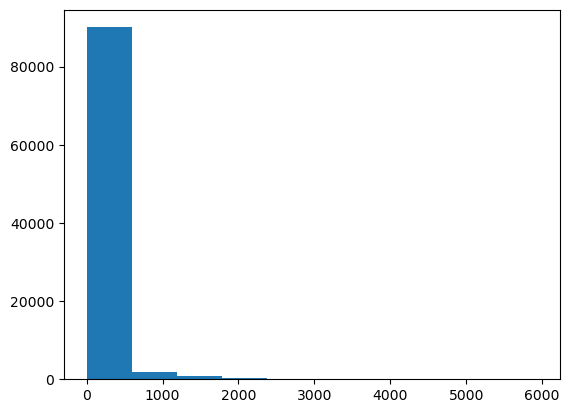

In [172]:
plt.hist(Bike_Count['Flow_Median'])
plt.show()

In [170]:
Bike_Count.to_csv('./Data/CitiBike/CitiBike_Route/Bike_Count.csv')

## Clean Data

In [181]:
len(Bike_Count)

93202

In [183]:
# keep segments with citibike flow
Bike_Sample = Bike_Count.loc[Bike_Count['Flow_Median'] >0]
len(Bike_Sample)

29740

In [184]:
Bike_Sample.describe()

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
count,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,...,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.00000
mean,94.773605,283.680464,243.598689,237.929388,184.083625,223.738601,221.983726,231.362441,154.022831,260.433826,...,236.846469,274.576429,242.129523,217.642334,196.394822,228.804069,231.180868,229.914728,227.853060,6850.10770
std,174.028093,545.824732,457.129281,455.516393,346.773304,425.448420,424.987290,447.195271,288.001165,502.001901,...,465.328411,536.045917,467.222667,428.341196,386.337017,450.073279,456.171084,446.927057,439.364105,13181.04411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.00000
25%,8.000000,23.000000,19.000000,18.000000,14.000000,17.000000,17.000000,18.000000,12.000000,19.000000,...,17.000000,17.000000,16.000000,15.000000,14.000000,16.000000,16.000000,16.000000,16.000000,506.75000
50%,30.000000,85.000000,75.000000,71.000000,55.500000,66.000000,64.000000,65.000000,46.000000,73.000000,...,62.000000,72.000000,66.000000,58.000000,52.000000,61.000000,61.000000,63.000000,64.000000,1938.00000
75%,99.000000,281.000000,247.000000,241.000000,186.000000,229.000000,222.000000,229.000000,158.000000,262.000000,...,229.000000,273.000000,244.000000,218.000000,193.000000,224.000000,226.000000,230.000000,229.000000,6877.00000
max,2015.000000,7698.000000,5950.000000,6580.000000,4644.000000,6221.000000,5641.000000,5658.000000,3472.000000,6747.000000,...,6057.000000,7387.000000,6453.000000,5827.000000,4959.000000,5880.000000,5827.000000,5940.000000,5881.000000,176447.00000


In [187]:
Bike_Sample['Flow_Median'].quantile(0.01)

1.0

In [186]:
Bike_Sample['Flow_Median'].quantile(0.99)

2143.220000000001

In [190]:
# filter out extreme value

Bike_Sample = Bike_Sample.loc[(Bike_Sample['Flow_Median'] >1) & (Bike_Sample['Flow_Median'] < 2143) ]
len(Bike_Sample)

28416

In [191]:
Bike_Sample.to_csv('./Data/CitiBike/CitiBike_Route/Bike_Sample.csv')